In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Calculus import Calculus
from Utils import mapFeatures, cmap_light, cmap_bold

In [2]:
c = Calculus()

In [3]:
data = np.genfromtxt('../A2_datasets/microchips.csv', delimiter=',')
X, y = data[:, :-1], data[:, -1]

1. Plot the data in X and y using different symbols or colors for the two different classes

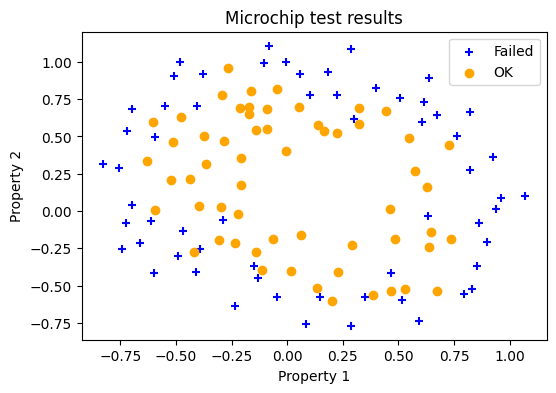

In [4]:
ok = data[y == 1]
fail = data[y == 0]

plt.figure(figsize=(6, 4))
plt.scatter(fail[:, 0], fail[:, 1], color='blue', marker='+', label = 'Failed')
plt.scatter(ok[:, 0], ok[:, 1], color='orange', marker='o', label = 'OK')

plt.xlabel('Property 1')
plt.ylabel('Property 2')
plt.title('Microchip test results')
plt.legend()

plt.show()

2. Use gradient descent to find in the case of a quadratic model. 
Print the hyper parameters alpha and Niter, and produce a 1x2 plot with: 

    1) the cost function J as a function over iterations, 
    2) the corresponding decision boundary (together with the X; y scatter plot),
    3) the number of training errors presented as a part of the
decision boundary plot title.

In [5]:
def plots(beta, cost_history, degree, training_error):
    _, axs = plt.subplots(1,2, figsize=(10, 5))
   
    # plot cost function history
    axs[0].plot(cost_history)
    axs[0].set_xlabel('Number of iterations')
    axs[0].set_ylabel('Cost')
    axs[0].set_title('Cost over Number of iterations')

    # plot the decision boundary
    h = 0.01 
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))  

    x1, x2 = xx.ravel(), yy.ravel()

    if(degree == 2):
        X_poly_e = c.extended_quadratic_matrix(x1, x2)
    else:
        X_poly_e = mapFeatures(x1, x2, degree)
        
    p = c.sigmoid(np.dot(X_poly_e, beta)) > 0.5
    clz_mesh = p.reshape(xx.shape) 

    axs[1].pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
    axs[1].scatter(X[:, 0], X[:, 1], c=y,cmap=cmap_bold)
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('y')
    axs[1].set_title('Training error = {}'.format(training_error))
    plt.tight_layout()
    plt.show()

Hiperparameters alpha: 0.2, Niter: 25000


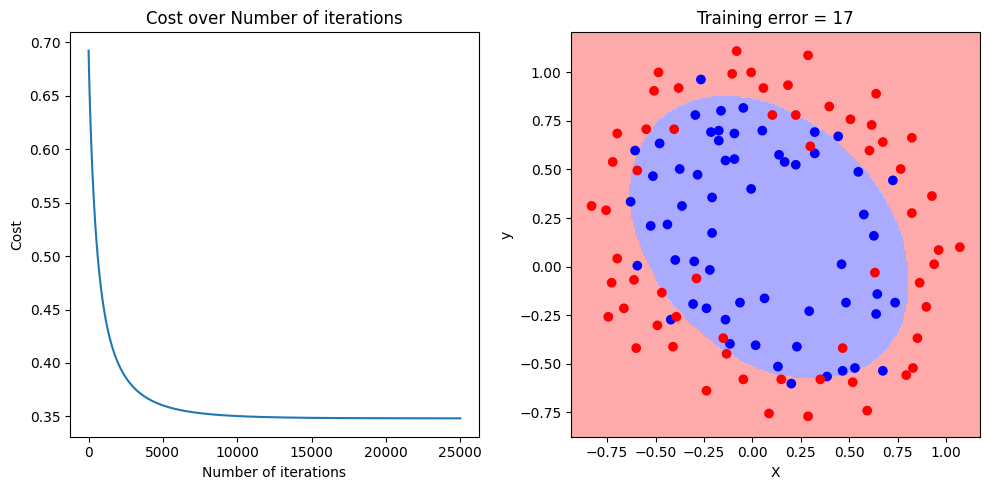

In [6]:
alpha = 0.2
Niter = 25000

# add polynomial features to X and extend it
XX_e = c.extended_quadratic_matrix(X[:, 0], X[:, 1])
beta, cost_history = c.logistic_gradient_descent(XX_e, y, alpha, Niter)

print('Hiperparameters alpha: {}, Niter: {}'.format(alpha, Niter))

p = c.sigmoid(np.dot(XX_e, beta)) > 0.5
training_error = np.sum(p != y)

plots(beta, cost_history, 2, training_error)

3. In this the final part of this exercise and upcoming exercises we will consider polynomial expressions of the features in logistic regression. Implement a method called mapFeatures.<br>
That is a function that takes two features X1, X2 and a degree d as input and outputs all combinations of polynomial terms of degree less than or equal to d of the variables X1 and X2

    For code reuse reasons, the mapFeature function has been defined in Utils.py

4. Use mapFeatures to repeat 2) but with a polynomial of degree five (d = 5) model

Hiperparameters alpha: 0.2, Niter: 25000


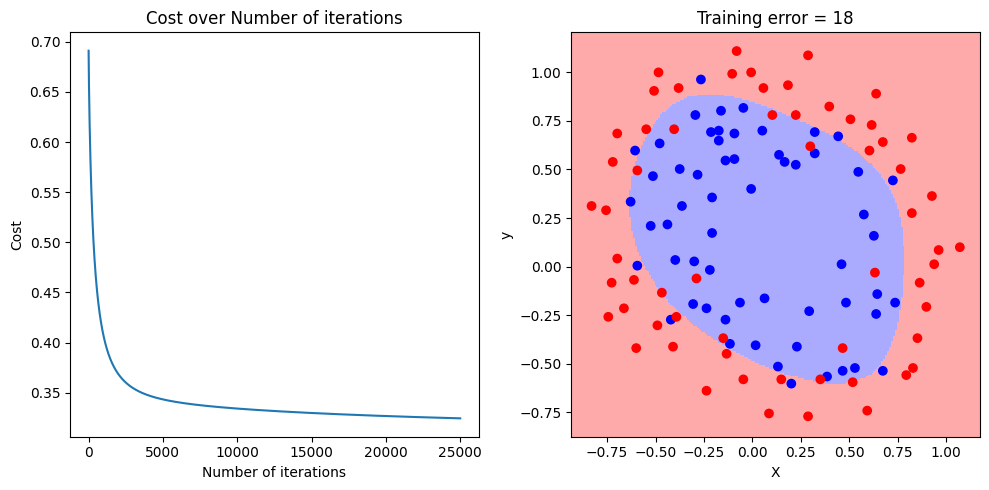

In [7]:
alpha = 0.2
Niter = 25000

# add polynomial features to X and extend it
XX_e = mapFeatures(X[:, 0], X[:, 1], 5)
beta, cost_history = c.logistic_gradient_descent(XX_e, y, alpha, Niter)

print('Hiperparameters alpha: {}, Niter: {}'.format(alpha, Niter))

p = c.sigmoid(np.dot(XX_e, beta)) > 0.5
training_error = np.sum(p != y)

plots(beta, cost_history, 5, training_error)